<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Limpesa_e_preprocessamento_de_dados_googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

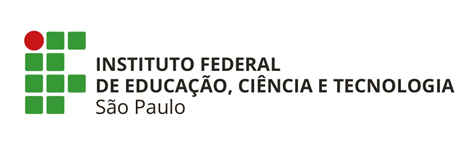

###Pacotes usados neste notebook

In [1]:
#Importanto pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1. Dataset

---


Dataset: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps

Este dataset contém dados sobre aplicativos da Google Play Store.
Cada observação (registro/linha) consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros.

##1.1 Importando o Dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 32.2MB/s]


In [4]:
!unzip google-play-store-apps.zip

Archive:  google-play-store-apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


In [5]:
data = pd.read_csv('/content/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##1.2 Informações básicas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


O dataset possui **10841** registros e **13** atributos. Alguns atributos possuyem atributos null que precisará ser tratado. Será necessário converter os tipos de dados de alguns atributos.

#2. Limpeza e Pré-processamento de Dados

---

In [7]:
df = data.copy()

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##2.1 Category

In [9]:
#checando de há ruídos na coluna "Category"
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
#Verificando o porque da existencia da categoria "1.9"
df.query('Category == "1.9"')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Removendo o registro da categoria "1.9"
df.drop(index=[10472], inplace=True)
df.shape

(10840, 13)

In [12]:
df['Category'].isnull().sum()

0

##2.2 Rating

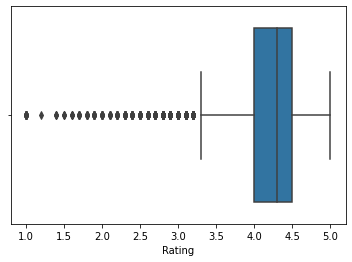

In [13]:
#Checando se possui outliers
sns.boxplot(x='Rating', data=df)

Por mais que o boxplot indique vários "outliers", considerando a distribuição, eles são valores aceitáveis e possíveis. Portanto não serão removidos

**Lidando com Nulls/NaN**

In [14]:
df.dropna(subset=['Rating'], inplace=True)

In [15]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
df['Rating'].isnull().sum()

0

##2.3 Reviews (número de avaliações)

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [19]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #Convertendo para formato numeric, em caso de erro substitui por NaN

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


##2.4 Size

In [22]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

O atributo "Size" possui os sufixos "k" e "M" para representar escala. Há ainda alguns registros com valor "Varies with divice".

A conversão destas strings para números resulta em NaN:

In [23]:
pd.to_numeric(df['Size'], errors='coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10836   NaN
10837   NaN
10839   NaN
10840   NaN
Name: Size, Length: 9366, dtype: float64

A substituição do símbolo/sufixo pela sua escala: Ex., M por 000000, poderá resultar em números errados para os números decimais: Ex., 2.5M ==> 2.5000000

Para isso, os símbolos serão substituidos por suas notações científicas: Ex., 'M' ==> e+6

In [24]:
#valores de 'Size' que terminam com 'M'
size_com_final_M = df['Size'].str.endswith('M') #mask
size_com_final_M

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9366, dtype: bool

In [25]:
df[size_com_final_M]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [26]:
#valores de 'Size' que terminam em 'k'
size_com_final_k = df['Size'].str.endswith('k')
df[size_com_final_k]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676k,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [27]:
#removendo os símbolos
df['Size'] = df['Size'].str.replace('k', 'e+3', regex=False)
df['Size'] = df['Size'].str.replace('M', 'e+6', regex=False)

In [28]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [29]:
df.loc[size_com_final_k,['Size']]

,Size
58,201000.0
209,23000.0
384,79000.0
450,118000.0
458,695000.0
...,...
10732,467000.0
10755,676000.0
10763,552000.0
10832,582000.0


**Lidando com os valores NaN**

In [30]:
print(f"Quantidade de registros com 'Size' NaN: {df['Size'].isnull().sum()} ({(df['Size'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'Size' NaN: 1637 (17.48%)


Após as conversões para o 'Size', temos **1637** valores NaN, uma quantidade considerável de registros no dataset (17.48%). Estes valores correspondem aos registros com valores 'Varies with device'.

A seguinte estratégia será adotada: atribuir o valor da **mediana** do Size da categoria para cada registro NaN.

In [31]:
apps_com_size_null_bool = df['Size'].isnull()
categorias_com_size_null  = df.loc[apps_com_size_null_bool, 'Category'].unique()

for cat in categorias_com_size_null:
  categorias_bool = df['Category'] == cat 
  df.loc[categorias_bool & apps_com_size_null_bool, 'Size'] = df.loc[categorias_bool & ~apps_com_size_null_bool, 'Size'].median()

In [32]:
df['Size'].isnull().sum() #não existem mais registros com Size NaN

0

**Remoção de Outliers**

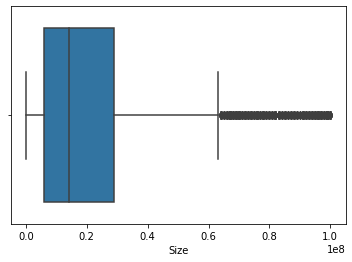

In [33]:
sns.boxplot(x='Size', data=df)

In [34]:
df.query('Size >= 1e8')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100000000.0,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500+,Paid,$15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,"5,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,"10,000,000+",Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,"1,000,000+",Free,0,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


Por mais que a grande maioria dos apps (75%) são pequenos, outros não são necessariamente outliers para se remover.

É comum existir apps maiores, principalmente jogos. Portanto, não será removido nenhum outlier desse atributo

##2.5 Installs

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


A coluna "**Installs**" possui valores com os sufixos '+' para indicar que o número de instalações é maior do que o valor passado.

Será assumido que o número de instalações é fixo, as virgulas também serão removidas.

In [37]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

Convertendo o tipo para **Númerico**

In [38]:
df['Installs'] =pd.to_numeric(df['Installs'], errors='coerce')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
df['Installs'].isnull().sum() #Não há nenhum registro com Installs NaN

0

**Remoção de Outliers**

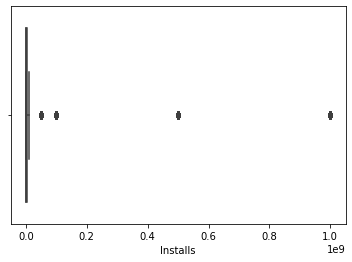

In [40]:
sns.boxplot(x='Installs', data=df)

In [41]:
#mostrando os 10 apps mais baixados
df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000000.0,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,6100000.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,6100000.0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000000.0,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,10500000.0,1000000000,Free,0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,6100000.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,7000000.0,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,19000000.0,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


O boxplot informa 'outliers' claros, sendo esses apps mais bem baixados muito usados. Os 'outliers' serão mantidos no dataset, porque representam a realidade. Durante a análise exploratória ele serão removidos para uma análise mais refinada dos casos gerais.

Há também casos de registros duplicados (Ex., Google News) que serão removidos.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


##2.6 Type

Chegando se há 'outliers' no atributo 'Type'

In [43]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [44]:
#Checando se há registros NaN
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [45]:
df['Type'].isnull().sum() #Não há registros NaN

0

##2.7 Price

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [47]:
#Checando se todos os valores de preço são strings
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Os valores são armazenados com cifrão (dólares). Será removido o cifrão e convertido de string para um tipo númerico

In [48]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)

In [49]:
#Convertendo de string para numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [50]:
df['Price'].isnull().sum() #Não há nenhum registro NaN para Price

0

In [51]:
#Checando de se há apps 'Free' com preços diferentes de zero
df.query('Type == "Free" and Price != 0')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Remoção de Outliers**

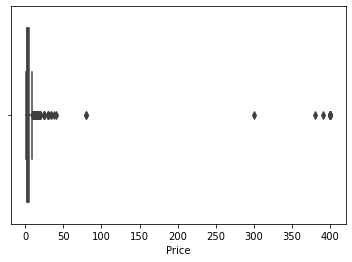

In [52]:
sns.boxplot(x='Price', data=df.query('Type == "Paid"'))

In [53]:
#Checando o porque de apps tão caros
df.query('Type == "Paid"').sort_values(by='Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up


Os outliers do preço são casos reais de aplicativos vendidos absurdamente caros, não se trata de dados obtidos erroneamente no dataset. Eles serão mantidos, porém durante a análise exploratória será feita uma análise sem eles.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


##2.8 Content Rating

In [55]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Não há registros com valores NaN e também não há ruidos. Não será realizado nenhum tipo de alteração

##2.9 Genres

In [56]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

Não há valores NaN para esse atributo. Porém há categorias que representam múltiplas categorias. Ex., um app do gênero *Art & Design;Pretend Play* na verdade possui dois gêneros: *Art & Design* e *Pretend Play*

Esses dados serão corrigidos na etapa de análise exploratória quando será feita a análise desse atributo.

##2.10 Last Updated

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [58]:
#Convertendo para datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

##2.11 Current Ver

**Lidando com valores NaN**

In [59]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up


Para que esses registros não sejam removidos devido a ausência do valor da versão do app, será atribuido a esses valores faltantes o valor de *1.0.0*, que é uma aproximação razoável.

In [60]:
df.fillna(value={'Current Ver': '1.0.0'}, inplace=True)

In [61]:
df['Current Ver'].isnull().sum() #Não há registros NaN

0

In [62]:
df.iloc[15]

App               Learn To Draw Kawaii Characters
Category                           ART_AND_DESIGN
Rating                                        3.2
Reviews                                        55
Size                                      2.7e+06
Installs                                     5000
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres                               Art & Design
Last Updated                  2018-06-06 00:00:00
Current Ver                                 1.0.0
Android Ver                            4.2 and up
Name: 15, dtype: object

**Inspecionando os valores do atributo**

In [63]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

As versões aparentam seguir um padrão: números seguidos de um ponto. Será checado se há registros que não seguem esse padrão, usando expressões regulares

In [64]:
#padrão válido para as versões dos apps
is_pattern = df['Current Ver'].str.match(r'^[0-9]+(\.[0-9]+)*$')

is_not_pattern = ~is_pattern

In [65]:
df[is_not_pattern]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,9200000.0,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,9200000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,16000000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
62,"ezETC (ETC balance inquiry, meter trial, real-...",AUTO_AND_VEHICLES,4.3,38846,8600000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-28,2.20 Build 02,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,10000000.0,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,9900000.0,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,9900000.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [66]:
df.loc[is_not_pattern, 'Current Ver'].unique()

array(['Varies with device', '2.20 Build 02', '18.05.31+530',
       '3.0.1.11 (Build 311)', '3.4.3_world', 'R6.0.3',
       '1.60.0.31354-release', '37.1.206017801.DR37_RC14', '7.3(800241)',
       '8.1.2-6310', '5.1.2-6310', '4.4B', '1.308.us', '3.8.75a',
       '4.9.2 (Oasis)', '1.5-beta', '3.6.0.115_FN', '1.5-play',
       '1.1.1-play', 'v1.8b22p13', '2.3.34 Prod', 'Cannonau 3.11.11',
       '8.0bld14', '4.1.1-0-prod', '3.04 - Beta', '3.2.0d',
       '2.76.2.0-android', 'p5.7.1', '7.3.4-play', '3.3.0(1)',
       'Public.Heal', '1.31.0-15160.950adac99', '8.2.0_8', 'v3.1.1',
       '5.2.4(881)', '1.0.0.21_180410', '2.4.12-r244', 'Version:6.97',
       '5.2.2018010801-1', '3.8.5.Go', '2.0081_206', '1_39_93',
       '1.2.3-play', '3.2.0h', '1.10.0.user.pro.release',
       '4.1.5 (Steglitz)', '1.7.1 (946)', '3.1-2018 – (13)',
       '1.830.0.564-(e405bb2)', 'PN.1.0', '10.4.1.015_05',
       '10.4.1.000_00', '2.5.0 b665', '1.4.15-free', 'T4.6.5-tl2.0.1',
       '50.2 lite', '6.25.0+1906

Existem diversos valores que não seguem o padrão. Será alterado somente o valor 'Varies with divice' para '1.0.0'.

In [67]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device', '1.0.0')

In [68]:
df[is_not_pattern].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,9200000.0,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,1.0.0,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,9200000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,1.0.0,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,16000000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,1.0.0,Varies with device
62,"ezETC (ETC balance inquiry, meter trial, real-...",AUTO_AND_VEHICLES,4.3,38846,8600000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-28,2.20 Build 02,4.1 and up


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9364 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


##2.12 Android Ver

**Lidando com valores NaN**

In [70]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000000.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100000.0,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


Esses registros possuem valores NaN para o atributo 'Android Ver'. Eles serão removidos pois se tratam de apenas dois registros

In [71]:
df.dropna(subset=['Android Ver'], inplace=True)

In [72]:
df['Android Ver'].isnull().sum() #Não há valores NaN

0

**Checando valores restantes**

In [73]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

Há diferentes formatações para a versão do Android, incluindo 'Varies with device'. A limpeza e pré-processamento desta coluna será realizada no momento de análise exploratória.

##2.13 Removendo Registros Duplicados

Notou-se que no item **2.5 Installs** existem registros duplicados. Nesta etapa estes casos serão tratados

In [74]:
#Retorna uma Series booleana mostrando os registros/linhas duplicados.
#Se nenhum subset for passado, um registro é considerado duplicado apenas se TODOS os valores das colunas de um registro são recpetivamente iguais às do outro registro
#
#keep='first' irá manter a primeira ocorrência de cada duplicação, ou seja, o valor desses casos será False
df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9364, dtype: bool

In [75]:
df[df.duplicated(keep='first')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,10000000.0,5000000,Free,0.0,Everyone,Business,2018-02-26,1.0.0,4.0.3 and up
236,Box,BUSINESS,4.2,159872,10000000.0,10000000,Free,0.0,Everyone,Business,2018-07-31,1.0.0,Varies with device
239,Google My Business,BUSINESS,4.4,70991,10000000.0,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,10000000.0,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,7000000.0,10000000,Free,0.0,Everyone,Productivity,2018-04-06,1.0.0,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,7000000.0,1000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,7000000.0,100000000,Free,0.0,Everyone,Productivity,2018-06-27,1.0.0,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up


Existem **474** registros duplicados

Checando os Aplicativos.

In [76]:
df[df.duplicated(keep='first')].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3800000.0,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26000000.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800000.0,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15000000.0,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11000000.0,100,Free,0.00,Mature 17+,Medical,2018-06-06,1.0.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34000000.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34000000.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34000000.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,19000000.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,1.0.0,Varies with device


Alguns registros possuem mais de uma duplicação, como o 'trivago: Hotels & Travel'

Caso não seja informado o subset para o método `DataFrame.duplicated()`, um registro será considerado duplicado se **TODOS** os valores dos atributos são respectivamente iguais às de outro registro.

A duplicidade será removida utilizando o método `DataFrame.drona()` que possui o mesmo comportamento que o método `DataFrame.duplicated()`.

In [77]:
df.drop_duplicates(keep='first', inplace=True)

In [78]:
df[df.duplicated(keep='first')] #Não há mais casos de registros duplicados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [79]:
print(f'O dataset possui agora {df.shape[0]} registros e {df.shape[1]} atributos.')

O dataset possui agora 8890 registros e 13 atributos.


**Checando se há mais duplicações**

A remoção realizado anteriormente apenas considera que registros são duplicado se **TODOS** os valores de cada coluna são respectivamente iguais entre os registros.

Porém, podem haver casos de um mesmo registro (com mesmo nome) ter sido lançado mais de uma vez, sendo que em cada lançamento (novo registro), o valor de alguma(s) coluna(s) são diferentes.

In [80]:
df[df.duplicated(subset='App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,10000000.0,5000000,Free,0.0,Everyone,Business,2018-02-26,1.0.0,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000000.0,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510,10000000.0,5000000,Free,0.0,Everyone,Business,2018-08-02,1.0.0,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000000.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,8000000.0,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,1.0.0,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1145,1400000.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60000000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up


Há **696** registros duplicados considerando apenas seus nomes (Apps).

Checando tais duplicações.

In [81]:
# keep=False ==> marca todas as linhas como duplicados
df[df.duplicated(subset=['App'], keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25000000.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25000000.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1675,8 Ball Pool,GAME,4.5,14198297,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28000000.0,10000000,Free,0.0,Everyone,Social,2018-07-26,7.3.1,4.1 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34000000.0,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34000000.0,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38000000.0,10000000,Free,0.0,Everyone,Weather,2018-08-06,1.0.0,Varies with device


Os registros duplicados acima são praticamente iguais, com exceção do valor de algum atributo. Ex., os registros do app '365Scores - Live Scores' só diferem para o atributo **Reviews**.

Essas duplicações serão excluídas para manter apenas a primeira ocorrência de cada uma.

In [82]:
df.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [83]:
df[df.duplicated(subset=['App'])] #Não há mais duplicações pelo nome do App

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [84]:
print(f'O dataset possui agora {df.shape[0]} registros e {df.shape[1]} atributos.')

O dataset possui agora 8194 registros e 13 atributos.


##2.14. Reindexando o dataset pré-procesado 

In [85]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,1.0.0,Varies with device


In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8190,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
8192,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,1.0.0,Varies with device


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8194 non-null   object        
 1   Category        8194 non-null   object        
 2   Rating          8194 non-null   float64       
 3   Reviews         8194 non-null   int64         
 4   Size            8194 non-null   float64       
 5   Installs        8194 non-null   int64         
 6   Type            8194 non-null   object        
 7   Price           8194 non-null   float64       
 8   Content Rating  8194 non-null   object        
 9   Genres          8194 non-null   object        
 10  Last Updated    8194 non-null   datetime64[ns]
 11  Current Ver     8194 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 832.3+ KB


##2.16. Outras possibilidades de Limpeza e Pre-Processamento para futuras implementações.




1.   Os rótulos de todos os atributos poderiam ser renomeados para o Portugues e/ou remover todos os espaços. A vantagem da remoção dos espaços é que seria possível acessar o atributo passando seu nome em `DataFrame`, exemplo:

  'Content Rating' ==> 'ContentRating' ==>
  `data.ContentRating`


2.   Utilizar algum algoritmo de similaridade de strings que mede a similaridade entre os nomes dos aplicativos: [Find the similarity metric between two strings](https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings).

  Em caso de alta similaridade entre os nomes de registros, essas duplicações seriam removidas



#3. Análise Exploratória dos Dados

---

**Estatísticas descritivas básicas**

In [89]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


##2.1 Quais são os 10 Apps mais baixados?

In [90]:
top10_apps_mais_baixados = df.sort_values(by='Installs', ascending=False).head(10)
top10_apps_mais_baixados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
293,Hangouts,COMMUNICATION,4.0,3419249,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device
1882,Google+,SOCIAL,4.2,4831125,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-26,1.0.0,Varies with device


Text(0.5, 1.0, 'Top 10 Apss mais baixados')

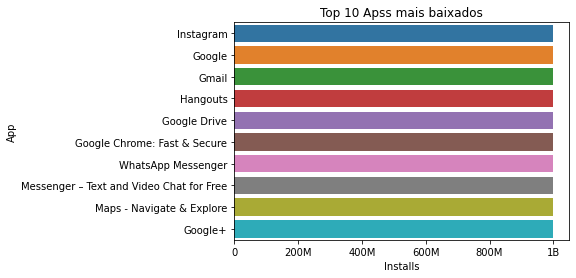

In [91]:
#plotando o mesmo gráfico na horizontal para melhor entendimento
sns.barplot(data=top10_apps_mais_baixados, x='Installs', y='App')
plt.xticks([0, 0.2e9, 0.4e9, 0.6e9, 0.8e9, 1e9], ['0', '200M', '400M', '600M', '800M', '1B'])
plt.title('Top 10 Apss mais baixados')

##2.2 Qual a quantidade de aplicativos por categoria?

In [92]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [93]:
df.value_counts(subset=['Category'])

Category           
FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
dtype: int64

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

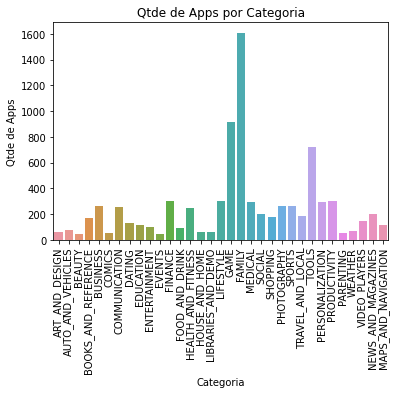

In [94]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

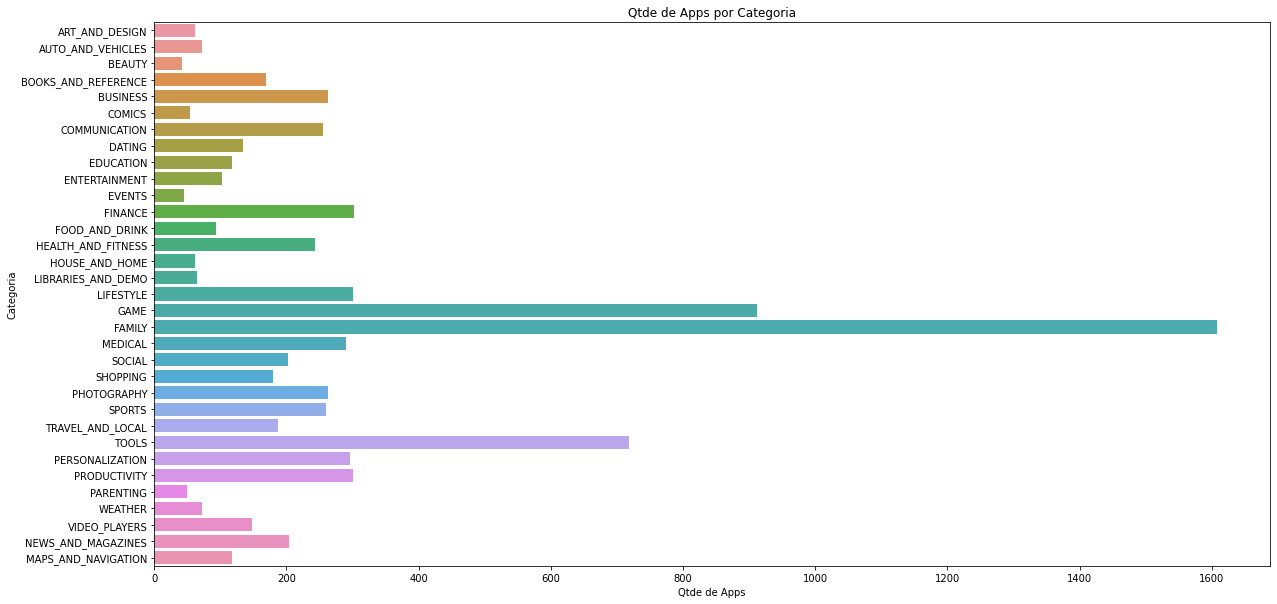

In [95]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category')
plt.ylabel('Categoria')
plt.xlabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

Ordenando as barras em ordem decrescente

In [96]:
order = df['Category'].value_counts().index
order

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'PRODUCTIVITY',
       'PERSONALIZATION', 'MEDICAL', 'PHOTOGRAPHY', 'BUSINESS', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

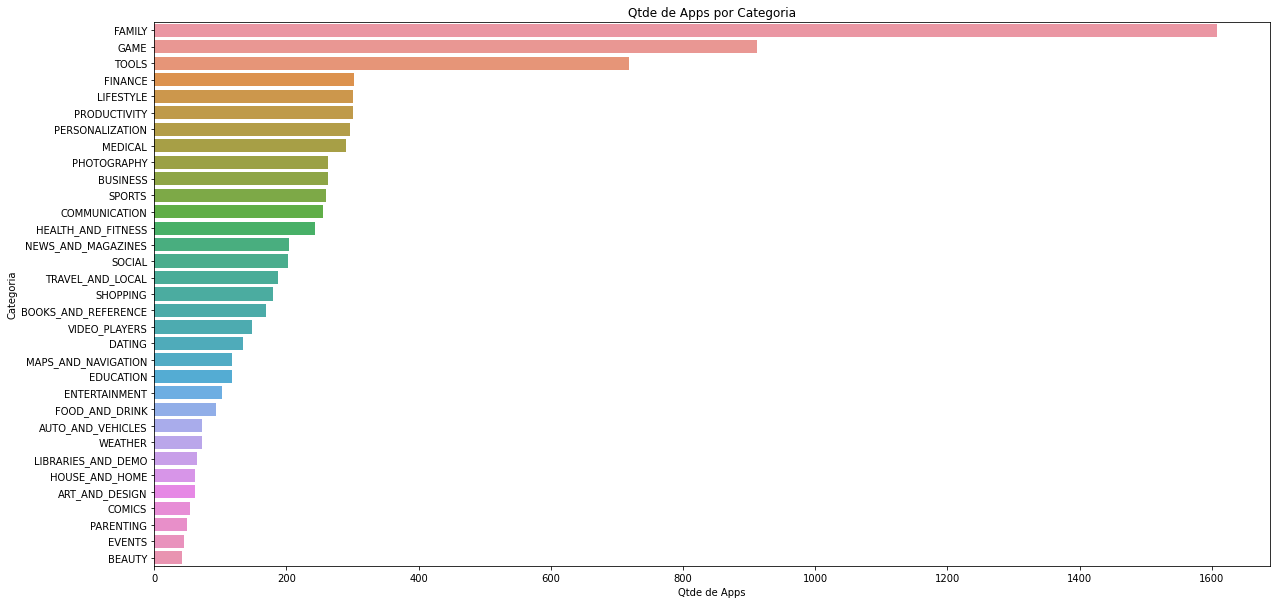

In [97]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category', order=order)
plt.ylabel('Categoria')
plt.xlabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

* As cores utilizadas no plot não tem qualquer significado (nenhuma variável foi codificada usando cor).

In [98]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [99]:
df['Rating'].describe()

count    8194.000000
mean        4.173175
std         0.536672
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [100]:
print(f'A nota média (avaliação) dos aplicativos é de {stats.loc["mean", "Rating"]:.2f} +- {stats.loc["std", "Rating"]:.2f}')
print(f'A mediana das avaliações é de {stats.loc["50%", "Rating"]}')

A nota média (avaliação) dos aplicativos é de 4.17 +- 0.54
A mediana das avaliações é de 4.3


A média e a mediana não estão muito longe e o desvio padrão não é tão alto, mesmo com uma tão baixa como é das avaliações (0 a 5). Tudo isso indica (em números) que a dispersão de notas/avaliações dos aplicativos não é tão grande.

**HISTOGRAMA**

Text(0.5, 1.0, 'Histograma das avaliações de todos os apps')

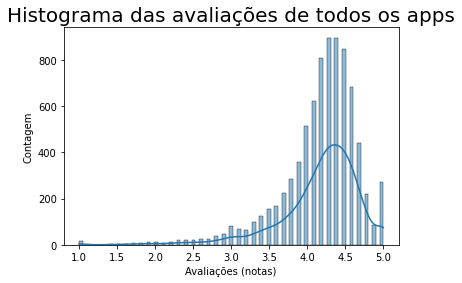

In [101]:
#kde ==> kernel density estimation
#É uma forma de estimar a função densidade de probabilidade de uma variável aleatória.

sns.histplot(data=df, x='Rating', kde=True)
plt.ylabel('Contagem')
plt.xlabel('Avaliações (notas)')
plt.title('Histograma das avaliações de todos os apps', fontsize=20)

A distrubuição das avaliações tem semelhanças com uma distribuição normal enviesada à esquerda (skewed left distribuition).

Nota-se que observando o grafico a maioria das avaliações estão no intervalo entre 4.0 e 5.0.

**BOXPLOT**

In [102]:
#mostrando uma coluna da tabela (dataframe) como uma outra tabela, ao invés de uma Series
stats[['Rating']]

,Rating
count,8194.000000
mean,4.173175
std,0.536672
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Text(0.5, 1.0, 'Boxplot das avaliações de todos os aplicativos')

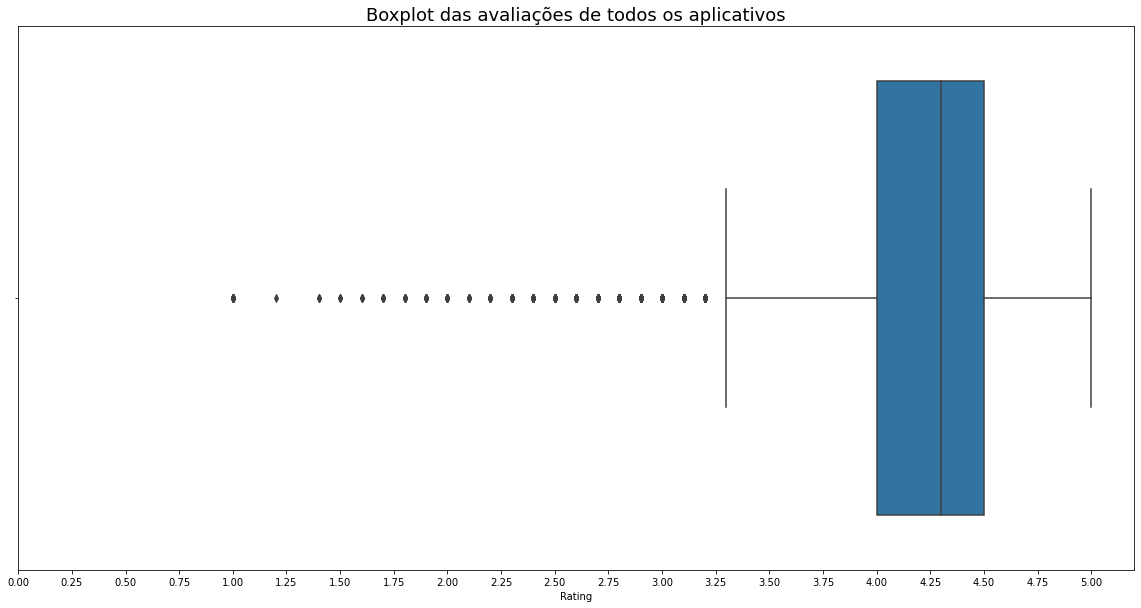

In [103]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25)) #gerando novos ticks para o eixo x
plt.title('Boxplot das avaliações de todos os aplicativos', fontsize=18)

No boxplot é possivel notar que 50% dos dados entre as avaliações 4.0 (Q1) e 4.5 (Q3), corroborando com os resultados vindos do método `.describe()`.

Por outro lado, ele interpretou que os aplicativos com avaliações menores do que ~3.25 são **outliers** da distribuição.

Entretanto, é comum existir aplicativos mal avaliados. Assim sendo, a inclusão destes aplicativos na análise é relevante.

In [104]:
apps_com_rating_leq_3_25 = df.query('Rating <= 3.25')
apps_com_rating_leq_3_25

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.0,Everyone,Art & Design,2018-06-06,1.0.0,4.2 and up
86,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1100000.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-04-27,1.4,4.0.3 and up
199,Plugin:AOT v5.0,BUSINESS,3.1,4034,23000.0,100000,Free,0.0,Everyone,Business,2015-09-11,3.0.1.11 (Build 311),2.2 and up
264,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15000000.0,5000000,Free,0.0,Teen,Comics,2018-07-03,6.3.0,4.0.3 and up
265,Daily Manga - Comic & Webtoon,COMICS,3.2,1446,7100000.0,100000,Free,0.0,Mature 17+,Comics,2018-05-18,1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34000000.0,100000,Free,0.0,Everyone,Health & Fitness,2018-07-10,4.2.1,7.0 and up
8078,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3300000.0,10000,Free,0.0,Everyone,Finance,2017-06-19,3.0.5,4.0 and up
8084,Pint - FN Theme,PERSONALIZATION,2.5,6,234000.0,100,Free,0.0,Everyone,Personalization,2013-08-10,1.0,2.2 and up
8138,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72000000.0,50000,Free,0.0,Everyone,Tools,2018-02-23,2.4.1,4.4 and up


In [105]:
print(f'A quantidade de apps considerados "outliers" por suas avaliações é de {apps_com_rating_leq_3_25.shape[0]} '
      f'({apps_com_rating_leq_3_25.shape[0]*100/df.shape[0]:.2f}%) de um total de {df.shape[0]} apps.')

A quantidade de apps considerados "outliers" por suas avaliações é de 492 (6.00%) de um total de 8194 apps.


O boxplot do seabonr identifica outliers usando o método de detecção via IQR. Para tanto, ele considera como outlier qualquer valor fora do intervalo [Q1 - 1.5IQR, Q3 + 1.5IQR]. Podemos controlar o fator 1.5 alterando o parâmetro `whis`.

Para que o boxplot não apresente outilers, basta passar um valor alto para o `whis`.

Text(0.5, 1.0, 'Boxplot das avaliações de todos os aplicativos')

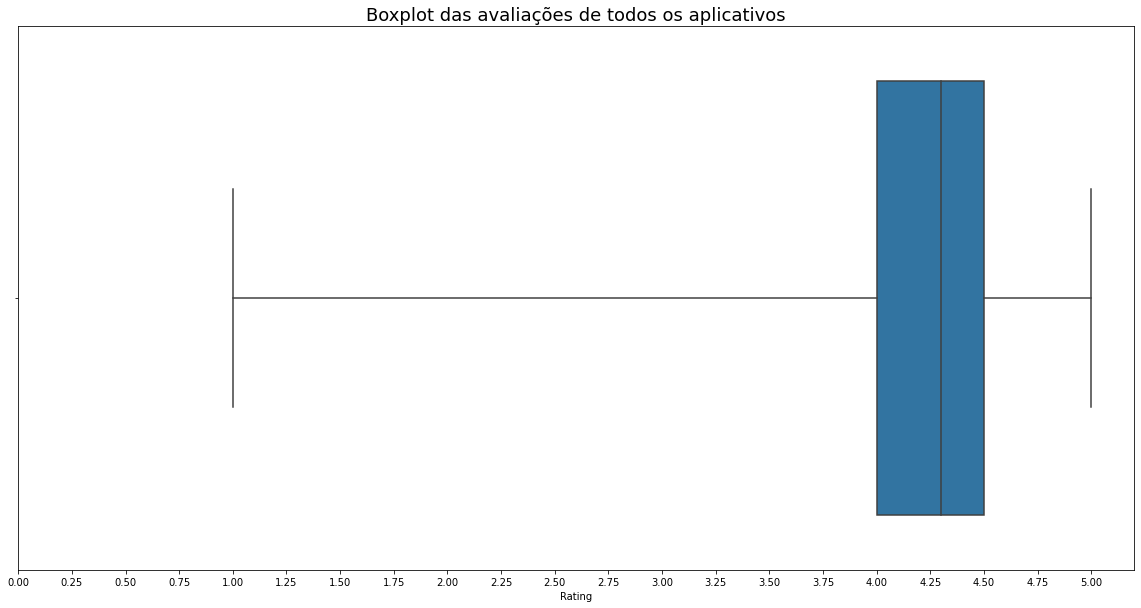

In [106]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating', whis=10)
plt.xticks(np.arange(0.0, 5.01, 0.25)) 
plt.title('Boxplot das avaliações de todos os aplicativos', fontsize=18)

**Violin Plot**

Text(0.5, 1.0, 'Violin plot das avaliações de todos os aplicativos')

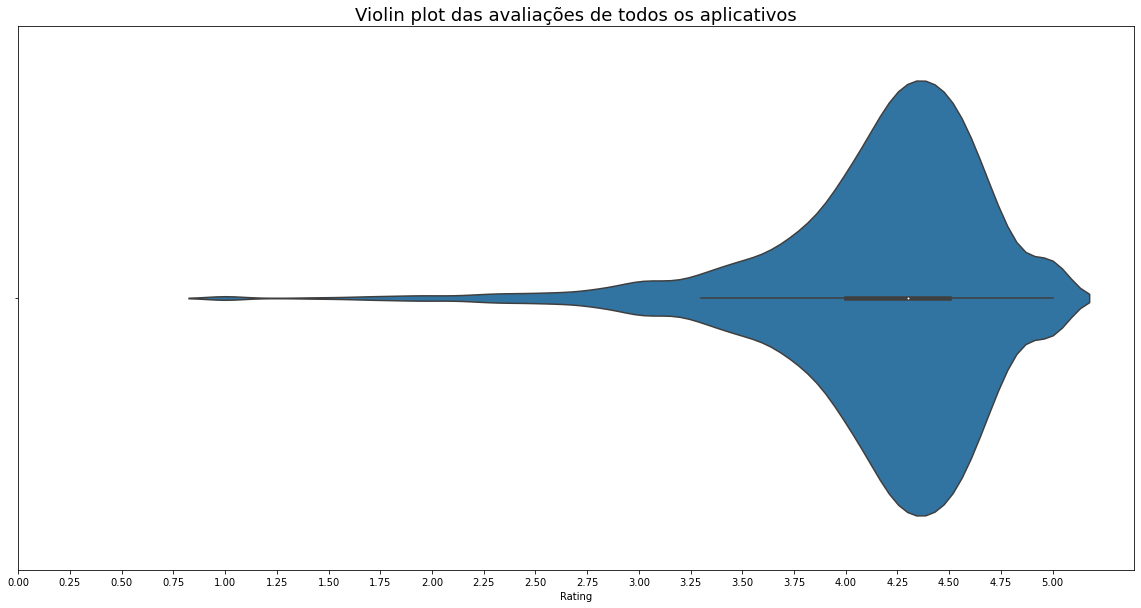

In [107]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25))
plt.title('Violin plot das avaliações de todos os aplicativos', fontsize=18)

O violin plot dá uma noção mais precisa de como dos dados estão distribuidos, principalmente, entre os quartis.

##2.4 Qual categoria é a melhor avaliada?

In [108]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


Será considerado que as melhores categorias são aquelas que possuem as maiores médias

In [109]:
stats.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
EVENTS,45.0,4.435556,0.419499,2.9,4.200,4.5,4.700,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
PERSONALIZATION,296.0,4.331419,0.360027,2.5,4.200,4.4,4.600,5.0
PARENTING,50.0,4.300000,0.517845,2.0,4.100,4.4,4.675,5.0
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
GAME,912.0,4.247368,0.384116,1.0,4.100,4.3,4.500,5.0
SOCIAL,203.0,4.247291,0.457209,1.9,4.100,4.3,4.500,5.0


Ao computar a média das avaliações por categoria e ordenar pela maior média, foi constatado que a categoria "EVENTS" possui a maior média. Porém não é possível afirmar que essa é a categoria melhor avaliada apenas olhando para estes resultados, pois o tamanho de cada amostra/grupo (ex., a quantidade de aplicativos por categoria) é diferente. Além disso o desvio padrão também muda de categoria para categoria. 

Ex., a categoria "EVENTS" possui 45 apps, enquanto "BOOKS_AND_REFERENCE" possui 169.

Uma maneira mais simples é garantir a mesma quantidade de observações para cada grupo (mesmo tamanho de amostra).
Para isso, seria assumido o tamanho do menor grupo, supondo N, e, para cada grupo restante, seria selecionado aleatoriamente N observações.
Seria realizado a seleção múltiplas vezes para que as observações selecionadas sejam representativa em relação a distribuição original.



Como forma de simplificação será assumido que apenas analisar esses resultados é suficiente para a decisão de quais são as categorias melhores avaliadas.

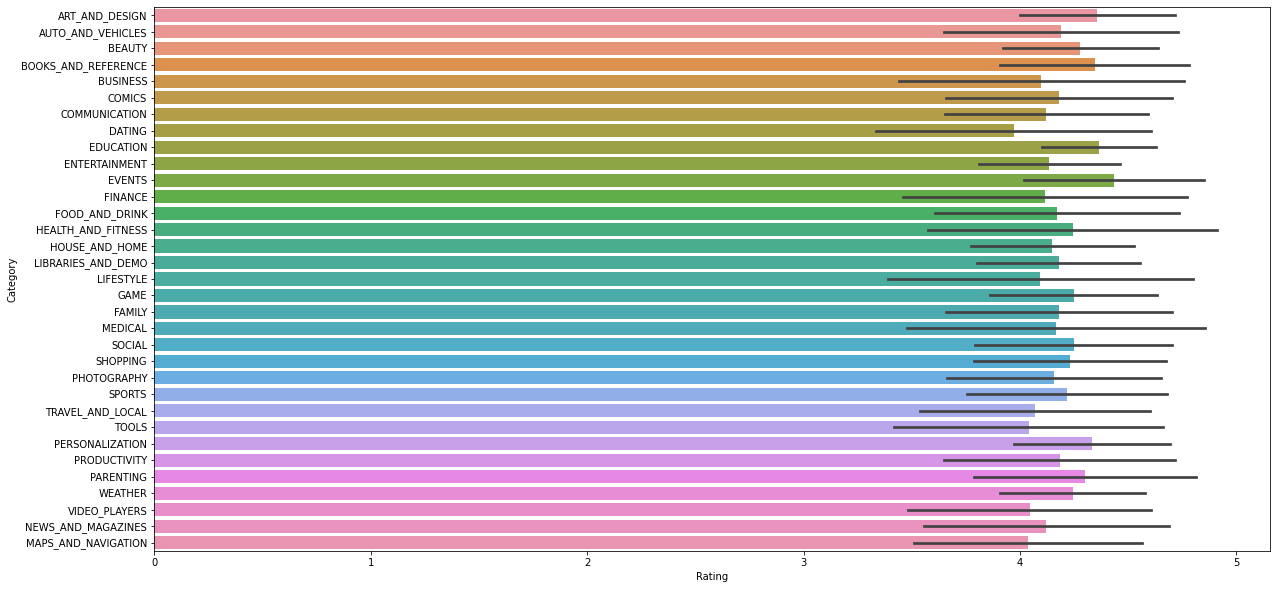

In [110]:
plt.figure(figsize=(20,10))
#o topo de cada barra mostra a média das avaliações para cada categoria
#o risco no topo da barra indica seu respectivo desvio padrão (parâmetro ci='sd')
sns.barplot(data=df, x='Rating', y='Category', ci='sd')

In [111]:
#o barplot será ordenado pela média das avaliações de cada grupo
order= stats.sort_values(by='mean', ascending=False).index
order

Index(['EVENTS', 'EDUCATION', 'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE',
       'PERSONALIZATION', 'PARENTING', 'BEAUTY', 'GAME', 'SOCIAL', 'WEATHER',
       'HEALTH_AND_FITNESS', 'SHOPPING', 'SPORTS', 'AUTO_AND_VEHICLES',
       'PRODUCTIVITY', 'COMICS', 'FAMILY', 'LIBRARIES_AND_DEMO',
       'FOOD_AND_DRINK', 'MEDICAL', 'PHOTOGRAPHY', 'HOUSE_AND_HOME',
       'ENTERTAINMENT', 'NEWS_AND_MAGAZINES', 'COMMUNICATION', 'FINANCE',
       'BUSINESS', 'LIFESTYLE', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'TOOLS',
       'MAPS_AND_NAVIGATION', 'DATING'],
      dtype='object', name='Category')

Text(0.5, 1.0, 'Avaliações das Categorias')

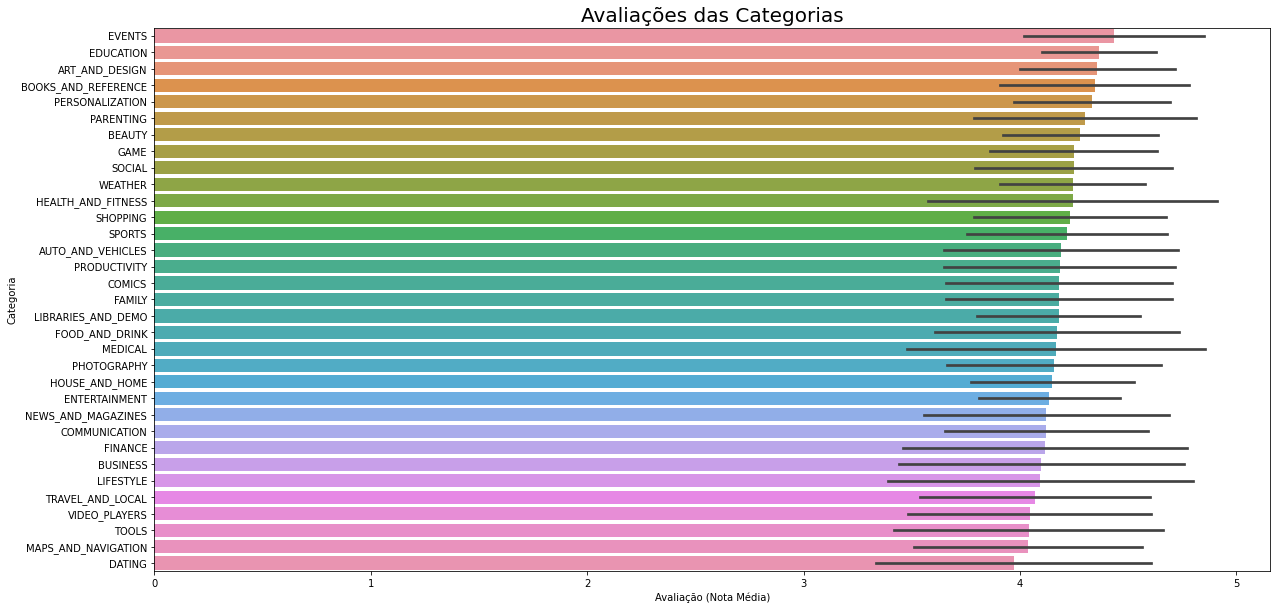

In [112]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Rating', y='Category', ci='sd', order=order)
plt.xlabel('Avaliação (Nota Média)')
plt.ylabel('Categoria')
plt.title('Avaliações das Categorias', fontsize=20)

Ao analisar o boxplot, nota-se que algumas categorias (ex., 'HEALTH_AND_FITNESS') possuem um desvio padrão um pouco maior do que as demais categorias.

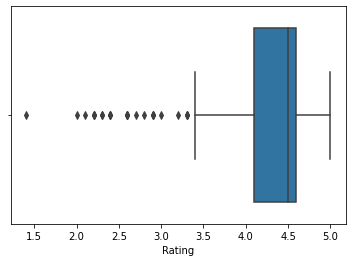

In [113]:
#Analisando a categoria HEALTH_AND_FITNESS, porque ela possui um std grande (caso específico)
sns.boxplot(data=df.query('Category == "HEALTH_AND_FITNESS"'), x='Rating')

##2.5 Como as avaliações se distribuem em cada categoria?

Variável Númerica x Variável Categórica.

In [114]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


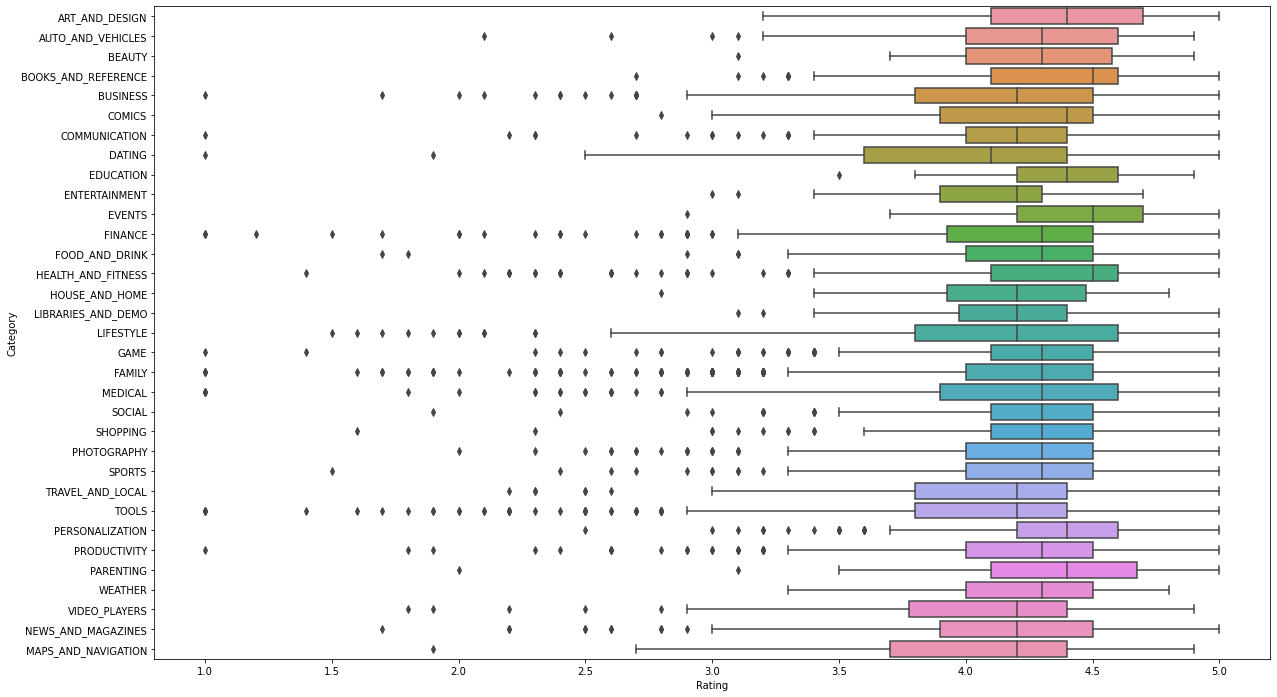

In [115]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='Rating', y='Category')

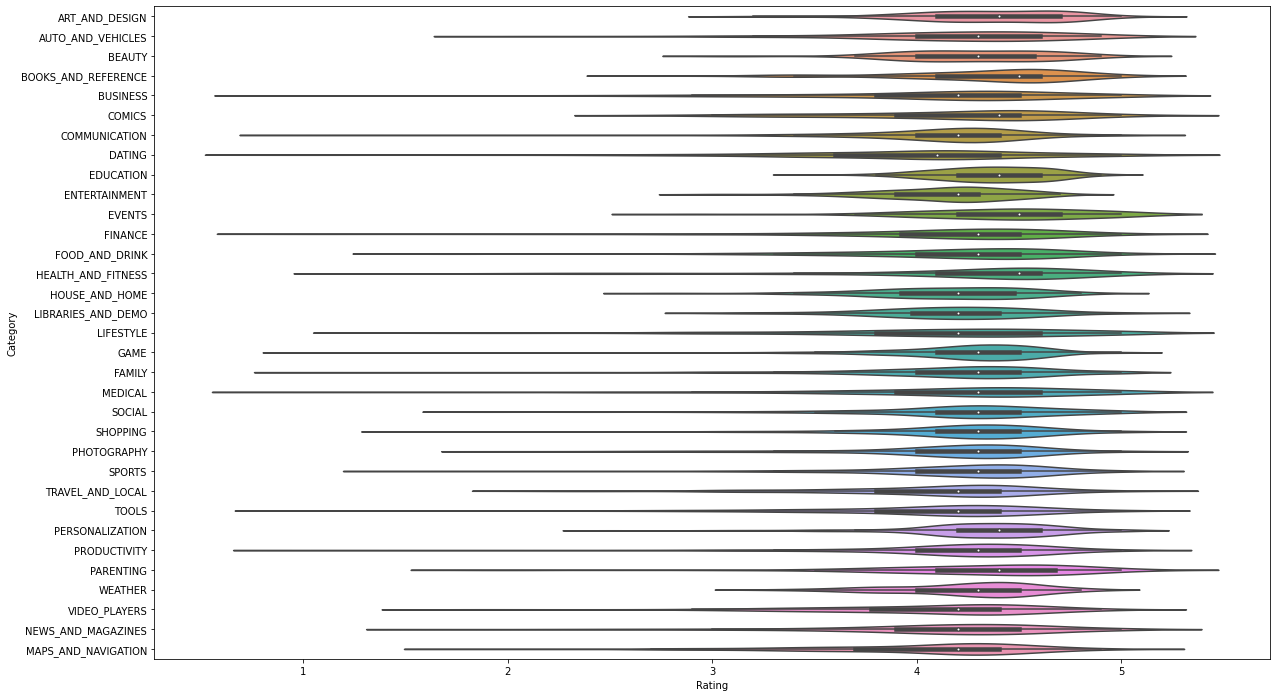

In [116]:
plt.figure(figsize=(20,12))
sns.violinplot(data=df, x='Rating', y='Category')

Para obter uma análise visual mais interessantem pode-se ordernar os boxplots (ou violin plots) de acordo com algum critério.
Por exemplo, pode-se ordená-los por mediana de cada categirua a fim de analisar, ex., como estão distribuidos a metade dos apps mais bem avaliados de cada categoria, além de diminuir o impacto de outliers na distribuição.

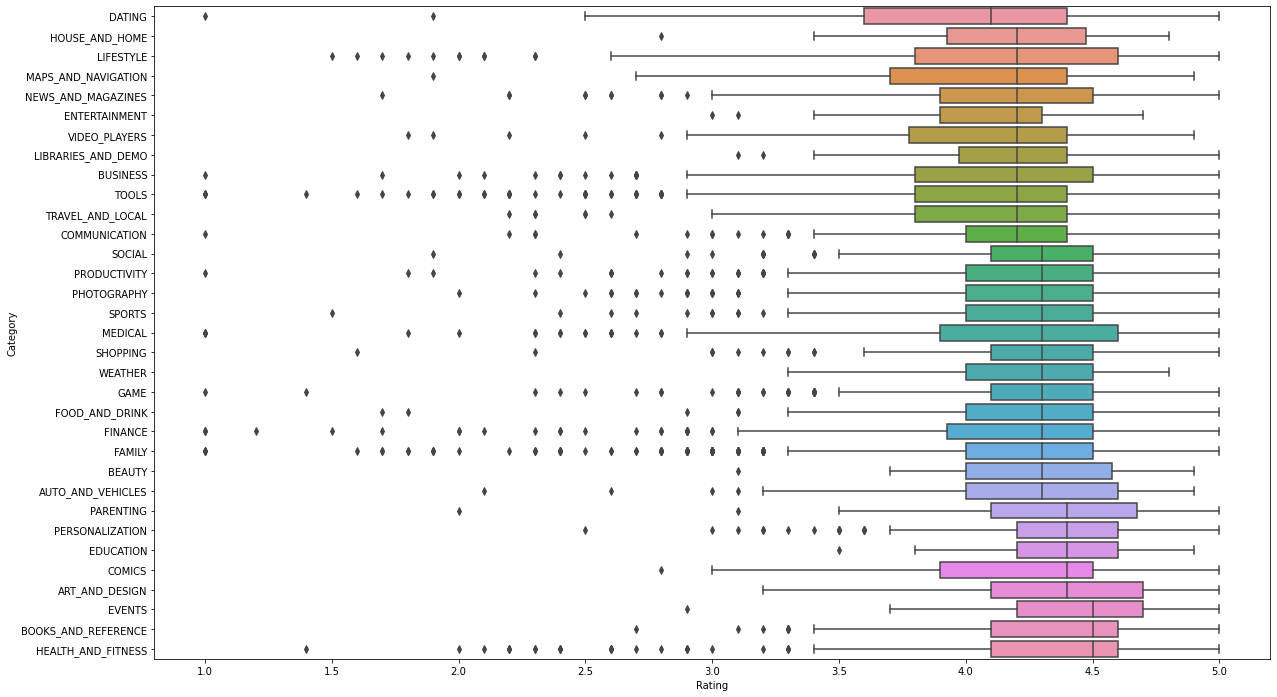

In [117]:
#ordenando pela mediana
order = stats.sort_values(by='50%').index

plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='Rating', y='Category', order=order)

Ao analisar os boxplots, nota-se que as categorias BOOKS_AND_REFERENCE e HEALTH_AND_FITNESS possuem uma quantidade considerável de apps muito bem avaliados --- ~50% de seus apps possuem avaliação >= 4.5. Entretanto, a variância (dispersão) de suas avaliações é muito alta, vários outliers.

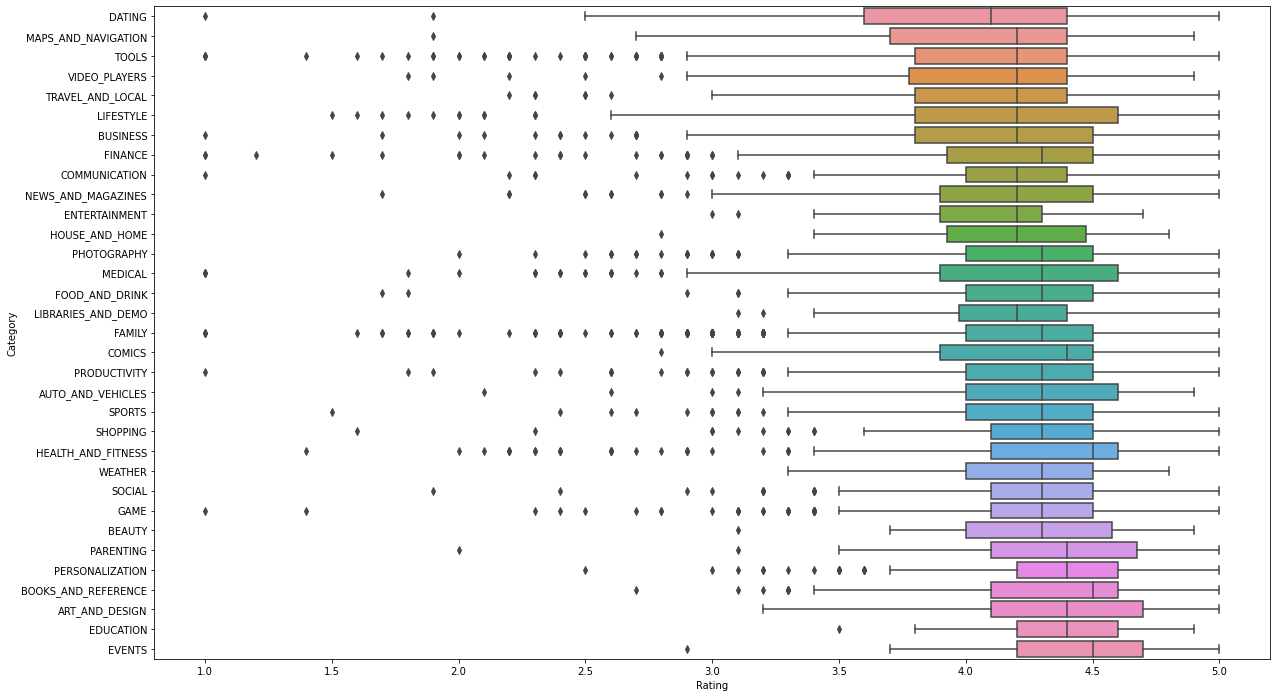

In [118]:
#Analisando o mesmo gráfico mas com as categorias organizadas pela média das avaliações
order = stats.sort_values(by='mean').index

plt.figure(figsize=(20,12))
sns.boxplot(data=df, x='Rating', y='Category', order=order)

Note-se que como a média é sensível a outliers, as categorias 'BOOKS_AND_REFERENCES' e, principalmente, 'HEALTH_AND_FITNESS' perderam posições. Categorias bem avaliadas e com poucos outliers (ex., 'EDUCATION' e 'EVENTS') apresentam médias maiores.

Em resumo, esta maneira de organizar e visualizar este gráfico é interessante quando se quer considerar o impacto dos outliers da variável analisada. A visualização anterior, ordenando pelas medianas, visa o oposto.

##2.6 Qual a média e distribuição de downloads/instalações dos apps em geral?

**CONSIDERANDO OS APPS MAIS POPULARES ('OUTLIERS')**

Será considerado que: Mais popular significa mais instalado

In [119]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [120]:
print(f'A média geral de instalações é de {stats.loc["mean", "Installs"]:.2f} +- {stats.loc["std", "Installs"]:.2f}')
print(f'A escala do número de instalações é de [{stats.loc["min", "Installs"]}, {stats.loc["max", "Installs"]}]')

A média geral de instalações é de 9167325.40 +- 58257799.04
A escala do número de instalações é de [1.0, 1000000000.0]


Embora a escala da variável seja muito alta ([1, 1B]) nota-se como o desvio padrão é consideravalmente alto, o que indica que a distibuição de instalações seja bem espalhada.

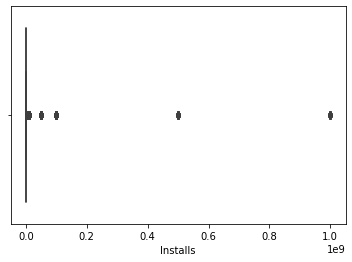

In [121]:
sns.boxplot(data=df, x='Installs')

De acordo com o0 bloxplot acima, existe uma pequena quantidade de apps que possuem uma quantidade muito alta de instalações ==> outliers.

In [123]:
#recuperando os 10 apps mais baixados (sem considerar nenhum critério de desempate)
#buscando apenas alguns exemplos
df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
293,Hangouts,COMMUNICATION,4.0,3419249,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device
1882,Google+,SOCIAL,4.2,4831125,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-26,1.0.0,Varies with device


De fato, os outliers são aplicativos extremamente populares e baixados.

Pode-se então fazer alguns tipos de anaálises frente a esta situação:



*   Analisar como os outliers (apps mais instalados) se comportam
*   Analisar os apps menos instalados (desconsiderando os outliers)

Para descobrir os outliers, pode-se analiar o boxplot e simplesmente observar qual é o intervalo de valores que os outliers se encontram.
Porém, uma forma mais interessante é utilizar, inicialmente, o método de detecção de outliers pelo IQR, que é justamente o método utilizado pelo boxplot acima. 



In [124]:
Q1 = stats.loc['25%', 'Installs']
Q3 = stats.loc['75%', 'Installs']

IQR = Q3 - Q1

#intervalo sem outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')
print(f'Intervalo sem outliers: [{lower_bound}, {upper_bound}]')

Q1 = 10000.0
Q3 = 1000000.0
IQR = 990000.0
Intervalo sem outliers: [-1475000.0, 2485000.0]


Como o número mínimo de instalações é 0, o intervalo sem outliers real é [0, 2485000]. Assim, os apps mais populares, com mais de 2485000 instalações, são considerados outliers.

In [126]:
apps_mais_populares = df.query('Installs > @upper_bound')
apps_mais_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000000.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400000.0,10000000,Free,0.0,Everyone,Photography,2017-06-03,4.0.7.0,2.3 and up
8152,Modern Strike Online,GAME,4.3,834117,44000000.0,10000000,Free,0.0,Teen,Action,2018-07-30,1.25.4,4.1 and up
8155,Big Hunter,GAME,4.3,245455,84000000.0,10000000,Free,0.0,Everyone 10+,Action,2018-05-31,2.8.6,4.0 and up
8182,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,9900000.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,1.0.0,Varies with device


Existem um totoal de 1978 apps com mais de 2485000 instalações.

**Analisando os apps mais populares**

In [127]:
stats_apps_mais_populares = apps_mais_populares.describe()
stats_apps_mais_populares

,Rating,Reviews,Size,Installs,Price
count,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1978.000000
mean,4.289130,1.029147e+06,2.687222e+07,3.706016e+07,0.004034
std,0.293063,3.943505e+06,2.430535e+07,1.141864e+08,0.158725
min,2.000000,6.600000e+01,4.100000e+04,5.000000e+06,0.000000
25%,4.200000,7.912975e+04,9.200000e+06,5.000000e+06,0.000000
50%,4.300000,2.104255e+05,1.800000e+07,1.000000e+07,0.000000
75%,4.500000,6.201300e+05,4.000000e+07,1.000000e+07,0.000000
max,4.900000,7.815831e+07,1.000000e+08,1.000000e+09,6.990000


In [128]:
print(f'A qtde de apps mais populares (número de instalações > 2485000.0) é de {apps_mais_populares.shape[0]}')
print(f'A média geral de instalações é de {stats_apps_mais_populares.loc["mean", "Installs"]:.2f} +- {stats_apps_mais_populares.loc["std", "Installs"]:.2f}')
print(f'A mediana de instalações é de {stats_apps_mais_populares.loc["50%", "Installs"]:.2f}')

A qtde de apps mais populares (número de instalações > 2485000.0) é de 1978
A média geral de instalações é de 37060161.78 +- 114186396.08
A mediana de instalações é de 10000000.00


O desvio padrão dos apps mais populares continua bem alto, o que indica que a distibuição do número de instalações é bem espalhada.
Além disso, nota-se que a média e a mediana do número de instalações são muito diferentes.

([<matplotlib.axis.XTick at 0x7f2ccb703c90>,
 <a list of 3 Text major ticklabel objects>)

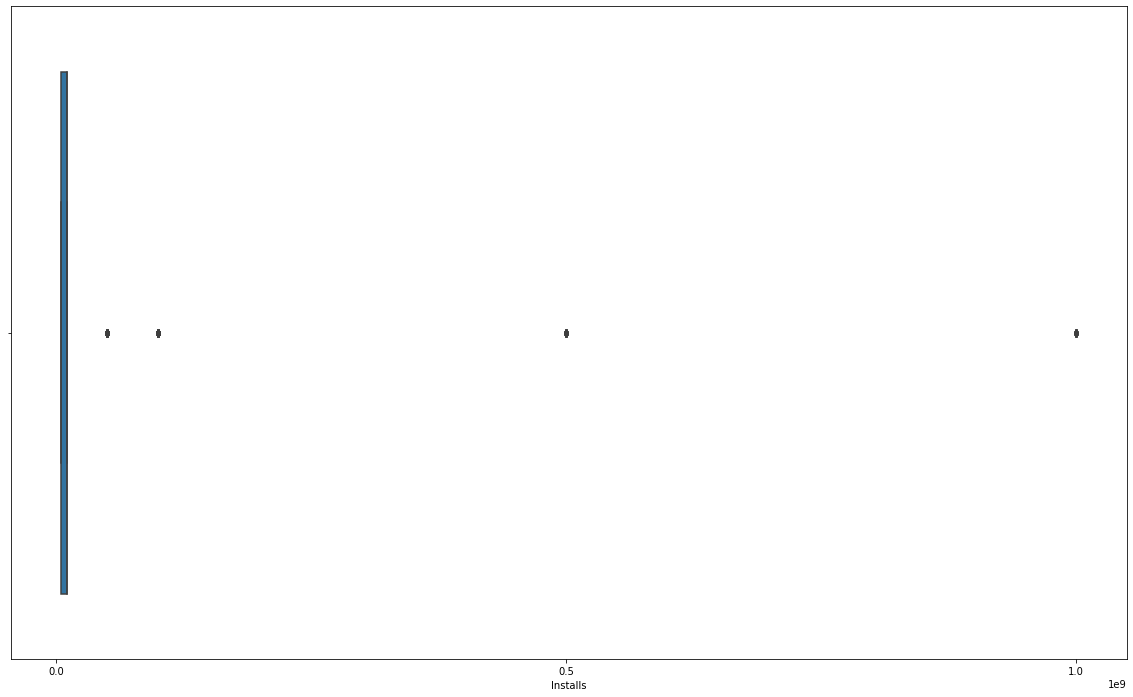

In [129]:
plt.figure(figsize=(20, 12))

sns.boxplot(data=apps_mais_populares, x='Installs')
plt.xticks(np.arange(0.0e9, 1.0001e9, 0.5e9)) #alterando os ticks do eixo x para uma melhor visualização

Nota-se que, mesmo entre os apps mais populares -- aqueles que possuem número de instalações maior que 2485000 -- há alguns que extrapolam o número de instalações (outliers).

Pelo boxplot, é possível chutar que qualquer app com mais do que 50M (0.05e9) são de fato outliers.


([<matplotlib.axis.XTick at 0x7f2cca86c490>,
 <a list of 3 Text major ticklabel objects>)

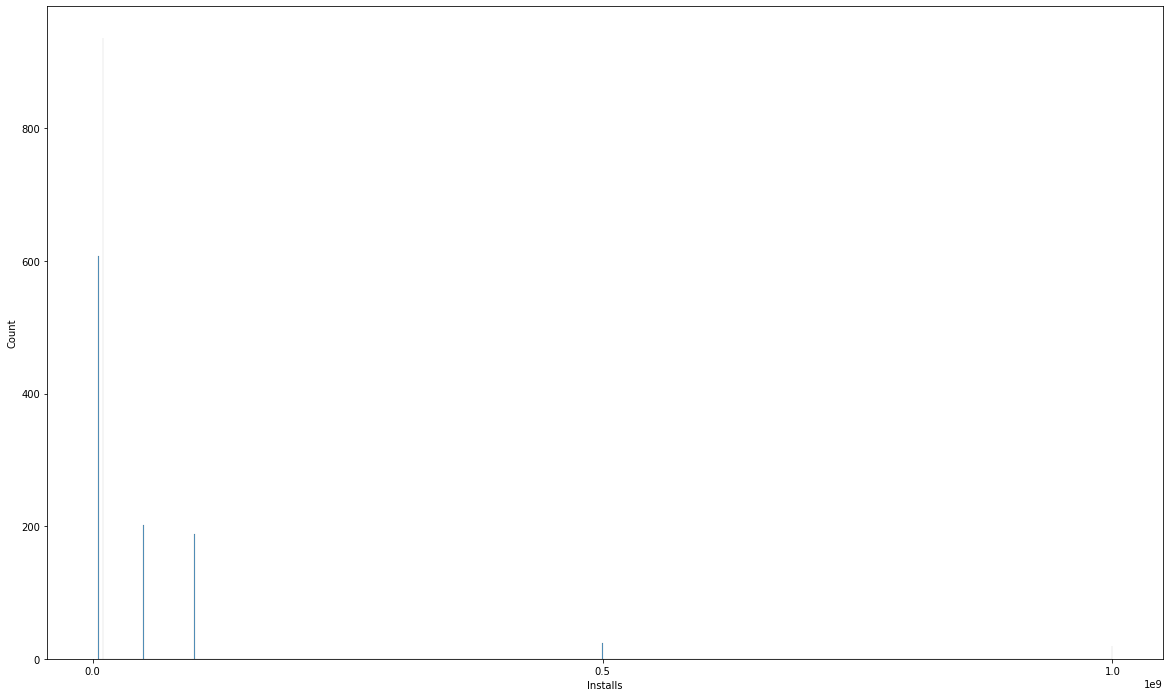

In [131]:
#Analisando o histograma dos apps mais populares

plt.figure(figsize=(20, 12))

sns.histplot(data=apps_mais_populares, x='Installs')
plt.xticks(np.arange(0.0e9, 1.0001e9, 0.5e9)) 

De fato, nota-se que a maior parte dos apps mais populares possuem número de instalações inferior a 50M (0.05e9).

Uma solução, seria estabelecer um novo intervalo de número de instalações para detectar outliers (apps mais populares). O novo intervalo poderia ser [0, 50000000], ao inves de [0, 2485000].
Consequentemente, seria diminuido o número de apps incialmente considerados outliers e seria aumentado a quantidade dos apps "normais" (menos populares).

O problema seria que, provavelmente, estes apps removidos dos outliers iniciais serão outliers na nova amostra de apps "normais".

Analisando o boxplot deste conjunto:

Text(0.5, 1.0, 'Distribuição do Número de Instalações para os Novos "Outliers"')

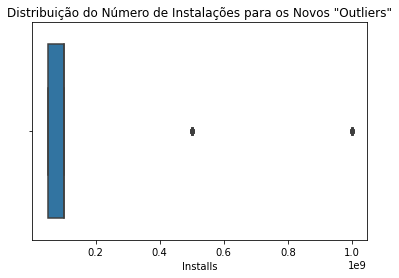

In [133]:
#bloxplot dos novos "outliers"
#qualquer app coom número de instalações maior ou igual a 50000000 será considerado outlier (antes o upper bound era 2485000)

sns.boxplot(data=df.query('Installs >= 50000000'), x='Installs')
plt.title('Distribuição do Número de Instalações para os Novos "Outliers"')

Ainda existem 'outliers' dentro da amostra de 'novos outliers' ==> alta variância.

Text(0.5, 1.0, 'Distribuição do Número de Instalações para a nova amostra SEM outliers')

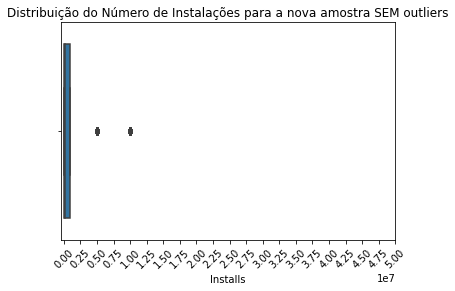

In [134]:
#boxplot dos apps "normais" (sem outliers)
#qualquer app coom número de instalações MENOR ou igual a 50000000 NÃO será considerado outlier (antes o upper bound era 2485000)

sns.boxplot(data=df.query('Installs < 50000000'), x='Installs')
plt.xticks(np.arange(0, 5.001e7, 0.25e7), rotation=45)
plt.title('Distribuição do Número de Instalações para a nova amostra SEM outliers')

No novo conjunto de apps menos populares, temos agora outliers, que são, justamente, os novos apps considerados.

Dado esse dilema, será adotada a seguinte estratégia:


*   Como o conjunto de apps mais populares (outliers iniciais) continuam com alta variância no númeo de instalações, independente se remover os apps com menos de 50M instalações, será mantido o conjunto de outliers originalmente obstidos como está.
*   Isso porque, neste momento, é interessante apenas a análise de uma única variável: Installs.
*   Desta forma, será mantido um conjunto de apps de fato sem outliers (apps com menos populares) para uma análise menos "ruidosa".

Uma estratégia mais interessante ao querer confrontar/analisar o número de instalações com outra variável é agrupar os apps, de acordo com suas quantidades de downloads, em uma nova variável categórica.
Isso tende a facilitar a análise, ex., isolando grupos de apps com números exorbitantes de instalação.



**Analisando a quantidade de Instalação dos apps menos populares (menos Instalados)**

In [135]:
upper_bound #upper bound dos apps menos populares

2485000.0

In [136]:
#selecionando todos os apps com número de instalação entre [0, upper_bound] ==> [0, 2485000.0]
apps_menos_populares = df.query('Installs <= @upper_bound')
apps_menos_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
8189,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8190,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [138]:
stats_apps_menos_populares = apps_menos_populares.describe()
stats_apps_menos_populares

,Rating,Reviews,Size,Installs,Price
count,6216.000000,6216.000000,6.216000e+03,6216.000000,6216.000000
mean,4.136277,9071.399453,1.872636e+07,291516.141892,1.366961
std,0.588830,22620.037305,2.014875e+07,406097.228321,19.346041
min,1.000000,1.000000,8.500000e+03,1.000000,0.000000
25%,3.900000,56.000000,4.500000e+06,5000.000000,0.000000
50%,4.200000,656.000000,1.100000e+07,50000.000000,0.000000
75%,4.500000,7006.000000,2.500000e+07,500000.000000,0.000000
max,5.000000,376223.000000,1.000000e+08,1000000.000000,400.000000


In [140]:
print(f'A qtde de apps menos populares (número de instalações <= 2485000.0) é de {apps_menos_populares.shape[0]}')
print(f'A média de instalações é de {stats_apps_menos_populares.loc["mean", "Installs"]:.2f} +- {stats_apps_menos_populares.loc["std", "Installs"]:.2f}')
print(f'A mediana de instalações é de {stats_apps_menos_populares.loc["50%", "Installs"]:.2f}')

A qtde de apps menos populares (número de instalações <= 2485000.0) é de 6216
A média de instalações é de 291516.14 +- 406097.23
A mediana de instalações é de 50000.00


O desvio padrão das instalações ainda é consideravelmente alto, mas bem menor do que os apps mais instalados.
A diferença entre a média e a mediana das instalações é menor do que para os apps mais instalados também.

Apenas analisando estas estatísticas descritivas, percebe-se que os números de instalações destes apps são bem distribuidos, mas em um intervalo bem menor do que para apps mais instalados.

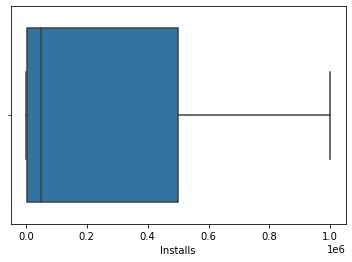

In [141]:
sns.boxplot(data=apps_menos_populares, x='Installs')

Dos apps menos populares:


*   25% (Q1) possuem apps com número de instalações <= 5000 (verificar tabela de describe)
*   50% (Q2 - mediana) possuem apps com número de instalações <= 50000 (verificar tabela de describe)
*   75% (Q3) possuem apps com número de instalações <= 500000 (verificar tabela de decribe)
*   25% possuem apps com número de instalações > 500000 e <= 1M
*   25% possuem apps com número de instalações espalhados no intervalo de [Q1, Q2] ==> [5000, 50000]
*   25% possuem apps com número de instalações espalhados no intervalo de [Q2, Q3] ==> [50000, 500000]
    *   maior variância (dispersão) dos dados do que o caso anterior



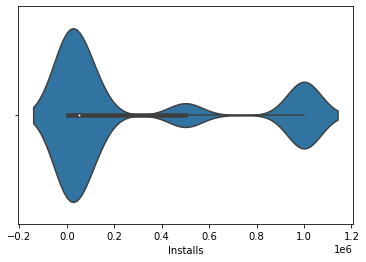

In [142]:
sns.violinplot(x='Installs', data=apps_menos_populares)

Dos 25% de apps mais instalados, a maioria deles possuem número de instalações perto de 1M.

##2.7 Criando grupos para a quantidade de instalações